# you are finished data preprocessing module now it`s time to show your skills that you have learned the next project about data analyst jobs this data from kaggle collected this data from Glassdoor website and the data stored in a csv file now you are required to show us you skills by follow the next steps
- 1- Load the data
- 2- extract some information about data
- 3- using all the method that you have learned to handle missing values
- 4-  calculate the minmum,maximum and the average salary for data analyst jobs with visualization uising plotly and tell us what you found
- 5- from the job describtion extract the most important skills tat data analyst needed and visualize it
- 6- what is the most job offer by sector and industry
- 7- visualize the Average salary based on company name and it`s rating
# your task to apply all you have learned to answer all the above

## import libraries

In [2]:
#prepare problem
import pandas as pd
import numpy as np
import seaborn as sns
import time
import random
import plotly.express as px
import matplotlib.pyplot as plt
from iso639 import languages
import user_agents
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo
import requests
import json
from geopy.distance import great_circle
from geopy.geocoders import Nominatim
from datasist.structdata import detect_outliers
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from datetime import datetime
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

%matplotlib inline


## load the data

In [3]:
df=pd.read_csv('DataAnalyst.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

Job Title  \
0  Data Analyst, Center on Immigration and Justic...   
1                               Quality Data Analyst   
2  Senior Data Analyst, Insights & Analytics Team...   
3                                       Data Analyst   
4                             Reporting Data Analyst   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   

                              Company Name      Location  Headquarters  \
0           Vera Institute of Justice\n3.2  New York, NY  New York, NY   
1  Visiting Nurse Service of New York\n3.8  New York, NY  New York, NY   
2                         Squarespace\n3.4  New York, NY  New York, NY   
3                            Celerity\n4.1  New York, NY    McLean, VA   
4                             FanDuel\n3.9  New York, NY  New York, NY   

                     Size  Founded               Type of ownership  \
0    201 to 500 employees     1961          Nonprofit Organization   
1        10000+ employees     1893          Nonprofit Organization   
2  1001 to 5000 employees     2003               Company - Private   
3    201 to 500 employees     2002  Subsidiary or Business Segment   
4   501 to 1000 employees     2009               Company - Private   

                           Industry                            Sector  \
0                 Social Assistance                        Non-Profit   
1  Health Care Services & Hospitals                       Health Care   
2                          Internet            Information Technology   
3                       IT Services            Information Technology   
4               Sports & Recreation  Arts, Entertainment & Recreation   

                      Revenue Competitors Easy Apply  
0  $100 to $500 million (USD)          -1       True  
1      $2 to $5 billion (USD)          -1         -1  
2    Unknown / Non-Applicable     GoDaddy         -1  
3   $50 to $100 million (USD)          -1         -1  
4  $100 to $500 million (USD)  DraftKings       True

In [4]:
#summarize data
#def dataset_shape():
    #print("head : ",df.head() )
    #print("shape : ",df.shape )
    #print("describe : ",df.describe() )
   # print("describe categories : ",df.describe(include='O') )
  #  print("types : ",df.dtypes )
 #   print("null columns : ",df.isnull().sum() )
#    print("info : ",df.info() )
df.shape
df.dtypes
df.describe()
df.describe(include='O')
df.isnull().sum()
#df.isna().sum()
df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Founded            2253 non-null   int64  
 9   Type of ownership  2253 non-null   object 
 10  Industry           2253 non-null   object 
 11  Sector             2253 non-null   object 
 12  Revenue            2253 non-null   object 
 13  Competitors        2253 non-null   object 
 14  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 264.1+ KB


## extract some information

In [5]:
df.columns=df.columns.str.strip().str.lower()
df.columns=df.columns.str.replace(' ','_')
df.columns


Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'easy_apply'],
      dtype='object')

In [7]:
df=df.replace(-1,np.nan)

In [8]:
df.isna().sum()
df.isna().mean() * 100
df.isna().sum()/len(df) * 100
df.isna().sum()/df.shape[0] * 100

job_title             0.000000
salary_estimate       0.000000
job_description       0.000000
rating               12.072792
company_name          0.044385
location              0.000000
headquarters          0.000000
size                  0.000000
founded              29.294274
type_of_ownership     0.000000
industry              0.000000
sector                0.000000
revenue               0.000000
competitors           0.000000
easy_apply            0.000000
dtype: float64

as we see above the -1 value is has no meaning so we will replace it with null value

In [9]:
df=df.replace('-1',np.nan)

In [10]:
df.describe()


rating      founded
count  1981.000000  1593.000000
mean      3.731903  1978.362837
std       0.670332    47.822289
min       1.000000  1682.000000
25%       3.300000  1970.000000
50%       3.700000  1997.000000
75%       4.100000  2006.000000
max       5.000000  2019.000000

In [11]:
df.describe(include='O')

job_title             salary_estimate  \
count           2253                        2252   
unique          1272                          89   
top     Data Analyst  $42K-$76K (Glassdoor est.)   
freq             405                          57   

                                          job_description  \
count                                                2253   
unique                                               2253   
top     Are you eager to roll up your sleeves and harn...   
freq                                                    1   

                                 company_name      location  headquarters  \
count                                    2252          2253          2081   
unique                                   1513           253           482   
top     Staffigo Technical Services, LLC\n5.0  New York, NY  New York, NY   
freq                                       58           310           206   

                       size  type_of_ownership     industry  \
count                  2090               2090         1900   
unique                    8                 14           88   
top     51 to 200 employees  Company - Private  IT Services   
freq                    421               1273          325   

                        sector                   revenue       competitors  \
count                     1900                      2090               521   
unique                      24                        13               290   
top     Information Technology  Unknown / Non-Applicable  Adecco, Manpower   
freq                       570                       615                14   

       easy_apply  
count          80  
unique          1  
top          True  
freq           80

In [12]:
df.isnull().sum()

job_title               0
salary_estimate         1
job_description         0
rating                272
company_name            1
location                0
headquarters          172
size                  163
founded               660
type_of_ownership     163
industry              353
sector                353
revenue               163
competitors          1732
easy_apply           2173
dtype: int64

In [ ]:
#univariate and bivariate analysis
lst=list(df.columns)
#lst=df.columns.to_list()
for i in range(len(lst)):
    print(df[lst[i]].value_counts())
    fig=px.histogram(df,x=lst[i],title=f'for feature {lst[i]} ',color_discrete_sequence=['green'],marginal='box',text_auto=True)
    fig.show()
print("------------------------------------------------------")    
for i in range(len(lst)):
    for j in range(i+1,len(lst)):
        fig=px.scatter(df,x=lst[i],y=lst[j],color_discrete_sequence=['pink'],title=f'for feature {lst[i]} vs feature {lst[j]} ')
        fig.show() 

In [13]:
#prepare data 
#feature extraction
#domain knowledge feature
df['min_salary(K)'] = df['salary_estimate'].str.strip("$").str[:3].str.replace("K", "").str.strip().astype("float")
df['max_salary(K)'] = df['salary_estimate'].str[6:10].str.replace('K','').str.lstrip('$').str.strip().astype("float")
df
#data and time feature
#string operations
#web data
#geo 

job_title  \
0     Data Analyst, Center on Immigration and Justic...   
1                                  Quality Data Analyst   
2     Senior Data Analyst, Insights & Analytics Team...   
3                                          Data Analyst   
4                                Reporting Data Analyst   
...                                                 ...   
2248  RQS - IHHA - 201900004460 -1q Data Security An...   
2249              Senior Data Analyst (Corporate Audit)   
2250  Technical Business Analyst (SQL, Data analytic...   
2251                Data Analyst 3, Customer Experience   
2252                        Senior Quality Data Analyst   

                  salary_estimate  \
0      $37K-$66K (Glassdoor est.)   
1      $37K-$66K (Glassdoor est.)   
2      $37K-$66K (Glassdoor est.)   
3      $37K-$66K (Glassdoor est.)   
4      $37K-$66K (Glassdoor est.)   
...                           ...   
2248  $78K-$104K (Glassdoor est.)   
2249  $78K-$104K (Glassdoor est.)   
2250  $78K-$104K (Glassdoor est.)   
2251  $78K-$104K (Glassdoor est.)   
2252  $78K-$104K (Glassdoor est.)   

                                        job_description  rating  \
0     Are you eager to roll up your sleeves and harn...     3.2   
1     Overview\n\nProvides analytical and technical ...     3.8   
2     We’re looking for a Senior Data Analyst who ha...     3.4   
3     Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4     ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   
...                                                 ...     ...   
2248  Maintains systems to protect data from unautho...     2.5   
2249  Position:\nSenior Data Analyst (Corporate Audi...     2.9   
2250  Title: Technical Business Analyst (SQL, Data a...     NaN   
2251  Summary\n\nResponsible for working cross-funct...     3.1   
2252  You.\n\nYou bring your body, mind, heart and s...     3.4   

                                 company_name        location  \
0              Vera Institute of Justice\n3.2    New York, NY   
1     Visiting Nurse Service of New York\n3.8    New York, NY   
2                            Squarespace\n3.4    New York, NY   
3                               Celerity\n4.1    New York, NY   
4                                FanDuel\n3.9    New York, NY   
...                                       ...             ...   
2248                       Avacend, Inc.\n2.5      Denver, CO   
2249                   Arrow Electronics\n2.9  Centennial, CO   
2250                                 Spiceorb      Denver, CO   
2251         Contingent Network Services\n3.1  Centennial, CO   
2252                          SCL Health\n3.4  Broomfield, CO   

          headquarters                    size  founded  \
0         New York, NY    201 to 500 employees   1961.0   
1         New York, NY        10000+ employees   1893.0   
2         New York, NY  1001 to 5000 employees   2003.0   
3           McLean, VA    201 to 500 employees   2002.0   
4         New York, NY   501 to 1000 employees   2009.0   
...                ...                     ...      ...   
2248    Alpharetta, GA     51 to 200 employees      NaN   
2249    Centennial, CO        10000+ employees   1935.0   
2250               NaN                     NaN      NaN   
2251  West Chester, OH    201 to 500 employees   1984.0   
2252    Broomfield, CO        10000+ employees   1864.0   

                   type_of_ownership                                 industry  \
0             Nonprofit Organization                        Social Assistance   
1             Nonprofit Organization         Health Care Services & Hospitals   
2                  Company - Private                                 Internet   
3     Subsidiary or Business Segment                              IT Services   
4                  Company - Private                      Sports & Recreation   
...                              ...                                      ...   
2248               Company - P

# Handling Missing Values

In [14]:
#cleansing
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'easy_apply', 'min_salary(K)', 'max_salary(K)'],
      dtype='object')

In [15]:
df.dtypes
df[(df['rating'] <=0) | (df['rating'] > 5) ]
df[(df['founded'] < 1600 ) | (df['founded'] > 2023)]
df[df['min_salary(K)'] <= 0 ]
df[df['max_salary(K)'] <= 0 ]
df[df['min_salary(K)'] > df['max_salary(K)'] ]

Empty DataFrame
Columns: [job_title, salary_estimate, job_description, rating, company_name, location, headquarters, size, founded, type_of_ownership, industry, sector, revenue, competitors, easy_apply, min_salary(K), max_salary(K)]
Index: []

In [16]:
df.isnull().sum()
df.dtypes

job_title             object
salary_estimate       object
job_description       object
rating               float64
company_name          object
location              object
headquarters          object
size                  object
founded              float64
type_of_ownership     object
industry              object
sector                object
revenue               object
competitors           object
easy_apply            object
min_salary(K)        float64
max_salary(K)        float64
dtype: object

In [17]:
#work with missing data
lst=['salary_estimate','company_name']
df.dropna(subset=lst,inplace=True)
df.isnull().sum()

job_title               0
salary_estimate         0
job_description         0
rating                271
company_name            0
location                0
headquarters          171
size                  162
founded               659
type_of_ownership     162
industry              352
sector                352
revenue               162
competitors          1730
easy_apply           2171
min_salary(K)           0
max_salary(K)           0
dtype: int64

In [18]:
df['rating'].value_counts()
df['rating']=df['rating'].fillna(df['rating'].mean())
df.isnull().sum()

job_title               0
salary_estimate         0
job_description         0
rating                  0
company_name            0
location                0
headquarters          171
size                  162
founded               659
type_of_ownership     162
industry              352
sector                352
revenue               162
competitors          1730
easy_apply           2171
min_salary(K)           0
max_salary(K)           0
dtype: int64

In [19]:
df['headquarters'].value_counts()
df['headquarters']=df['headquarters'].fillna('not mentioned')
df.isnull().sum()

job_title               0
salary_estimate         0
job_description         0
rating                  0
company_name            0
location                0
headquarters            0
size                  162
founded               659
type_of_ownership     162
industry              352
sector                352
revenue               162
competitors          1730
easy_apply           2171
min_salary(K)           0
max_salary(K)           0
dtype: int64

In [20]:
df['size'].value_counts()
df['size']=df['size'].fillna('not mentioned')
df.isnull().sum()

job_title               0
salary_estimate         0
job_description         0
rating                  0
company_name            0
location                0
headquarters            0
size                    0
founded               659
type_of_ownership     162
industry              352
sector                352
revenue               162
competitors          1730
easy_apply           2171
min_salary(K)           0
max_salary(K)           0
dtype: int64

In [21]:
df['founded'].value_counts()
df['founded']=df['founded'].fillna(df['founded'].mode()[0])
df.isnull().sum()

job_title               0
salary_estimate         0
job_description         0
rating                  0
company_name            0
location                0
headquarters            0
size                    0
founded                 0
type_of_ownership     162
industry              352
sector                352
revenue               162
competitors          1730
easy_apply           2171
min_salary(K)           0
max_salary(K)           0
dtype: int64

In [22]:
df['type_of_ownership'].value_counts()
df['type_of_ownership']=df['type_of_ownership'].fillna('Unknown')
df.isnull().sum()

job_title               0
salary_estimate         0
job_description         0
rating                  0
company_name            0
location                0
headquarters            0
size                    0
founded                 0
type_of_ownership       0
industry              352
sector                352
revenue               162
competitors          1730
easy_apply           2171
min_salary(K)           0
max_salary(K)           0
dtype: int64

In [23]:
df['industry'].value_counts()
df['industry']=df['industry'].fillna('not mentioned')
df.isnull().sum()

job_title               0
salary_estimate         0
job_description         0
rating                  0
company_name            0
location                0
headquarters            0
size                    0
founded                 0
type_of_ownership       0
industry                0
sector                352
revenue               162
competitors          1730
easy_apply           2171
min_salary(K)           0
max_salary(K)           0
dtype: int64

In [24]:
df['sector'].value_counts()
df['sector']=df['sector'].fillna('not mentioned')
df.isnull().sum()

job_title               0
salary_estimate         0
job_description         0
rating                  0
company_name            0
location                0
headquarters            0
size                    0
founded                 0
type_of_ownership       0
industry                0
sector                  0
revenue               162
competitors          1730
easy_apply           2171
min_salary(K)           0
max_salary(K)           0
dtype: int64

In [25]:
df['revenue'].value_counts()
df['revenue']=df['revenue'].fillna('Unknown / Non-Applicable')
df.isnull().sum()

job_title               0
salary_estimate         0
job_description         0
rating                  0
company_name            0
location                0
headquarters            0
size                    0
founded                 0
type_of_ownership       0
industry                0
sector                  0
revenue                 0
competitors          1730
easy_apply           2171
min_salary(K)           0
max_salary(K)           0
dtype: int64

In [26]:
df['competitors'].value_counts()
df['competitors']=df['competitors'].fillna('not mentioned')
df.isnull().sum()

job_title               0
salary_estimate         0
job_description         0
rating                  0
company_name            0
location                0
headquarters            0
size                    0
founded                 0
type_of_ownership       0
industry                0
sector                  0
revenue                 0
competitors             0
easy_apply           2171
min_salary(K)           0
max_salary(K)           0
dtype: int64

In [27]:
df['easy_apply'].value_counts()
df['easy_apply']=df['easy_apply'].fillna('apply on company website')
df.isnull().sum()

job_title            0
salary_estimate      0
job_description      0
rating               0
company_name         0
location             0
headquarters         0
size                 0
founded              0
type_of_ownership    0
industry             0
sector               0
revenue              0
competitors          0
easy_apply           0
min_salary(K)        0
max_salary(K)        0
dtype: int64

In [28]:
#cleansing
df.dtypes
lst=['founded','min_salary(K)','max_salary(K)']
for i in lst :
    df[i]=df[i].astype(int)
df.dtypes    

job_title             object
salary_estimate       object
job_description       object
rating               float64
company_name          object
location              object
headquarters          object
size                  object
founded                int32
type_of_ownership     object
industry              object
sector                object
revenue               object
competitors           object
easy_apply            object
min_salary(K)          int32
max_salary(K)          int32
dtype: object

In [29]:
#detect and handle outliers
#detect
lst=[]
for i in df.columns:
    if df[i].dtypes == 'int32' or df[i].dtypes == 'float64' :
        lst.append(i)
lst   

['rating', 'founded', 'min_salary(K)', 'max_salary(K)']

detect outliers
---------------------------------------------


<AxesSubplot:xlabel='founded'>

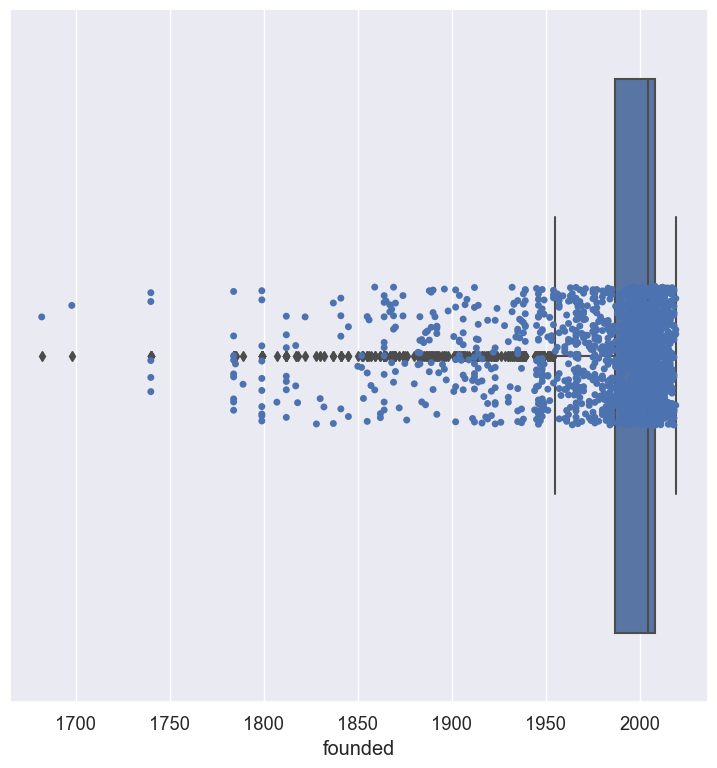

In [30]:
sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)
print("detect outliers")
print("---------------------------------------------")
sns.boxplot(data=df,x='founded')
sns.stripplot(data=df,x='founded')

In [31]:
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'easy_apply', 'min_salary(K)', 'max_salary(K)'],
      dtype='object')

In [32]:
#string operation
#fix job title
df['job_title'].value_counts().head(30)
df['job_title']=df['job_title'].str.replace("Sr. Data Analyst", "Senior Data Analyst").str.replace("Sr Data Analyst", "Senior Data Analyst")\
.str.replace("Data Analyst Senior", "Senior Data Analyst").str.replace('Jr. Data Analyst','Junior Data Analyst')\
.str.replace('Jr Data Analyst','Junior Data Analyst').str.replace('Data Analyst Junior','Junior Data Analyst')
df['job_title'].value_counts().head(30)

C:\Users\C.LAB\AppData\Local\Temp\ipykernel_10244\1339308195.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['job_title']=df['job_title'].str.replace("Sr. Data Analyst", "Senior Data Analyst").str.replace("Sr Data Analyst", "Senior Data Analyst")\


Data Analyst                               404
Senior Data Analyst                        121
Junior Data Analyst                         50
Business Data Analyst                       28
Data Analyst II                             17
Data Quality Analyst                        17
Data Governance Analyst                     16
Lead Data Analyst                           15
Data Reporting Analyst                      13
Financial Data Analyst                      12
Data Analyst I                              11
Data Analyst III                            11
Marketing Data Analyst                       9
Data Management Analyst                      8
Data Warehouse Analyst                       8
SQL Data Analyst                             7
Data Science Analyst                         7
Technical Data Analyst                       7
Healthcare Data Analyst                      6
Research Data Analyst                        6
Data Security Analyst                        6
Clinical Data

as we above there is many same job title with different names so we need to fix that

## Feature engineering

In [ ]:
#feature extraction

In [36]:
#calculate the minmum,maximum and the average salary for data analyst jobs with visualization uising plotly and tell us what you found
df.columns
df['min_salary(K)']
df['max_salary(K)']
df['avr']=(df['min_salary(K)']+df['max_salary(K)'])/2
df['avr']

0       51.5
1       51.5
2       51.5
3       51.5
4       51.5
        ... 
2248    91.0
2249    91.0
2250    91.0
2251    91.0
2252    91.0
Name: avr, Length: 2251, dtype: float64

In [37]:
lst=['min_salary(K)','max_salary(K)','avr']
for i in lst :
    fig=px.histogram(df,i,color_discrete_sequence=['blue'],text_auto=True,title=f'for feature {i}',marginal='box')
    fig.show()

In [38]:
px.box(df,lst,color_discrete_sequence=['blue'])

let`s see the distribution of min,max and average salaries

Minimum salary: Average minimum salary is around 57K and median value for minimum salary is around 50K. We can see that it has right skewed distribution. 
>Maximum salary:Average maximum salary is around 89K and median value for maximum salary is around 87K. We can see that it has right skewed distribution.
>>Average salary: Average salary is around 72K

In [45]:
#from the job description extract the most important skills that data analyst needed and visualize it
df.columns
x=df[df['job_title'] == 'Data Analyst']['job_description']
x

3       Requisition NumberRR-0001939\nRemote:Yes\nWe c...
5       About Cubist\nCubist Systematic Strategies is ...
8       The Data Analyst is an integral member of the ...
10      NYU Grossman School of Medicine is one of the ...
11      BulbHead is currently seeking a Data Analyst t...
                              ...                        
2193    RESPONSIBILITIES:\n\nKforce has a client in se...
2197    Job Description\nVoca Technology has immediate...
2200    Role Data Analyst Duration12+ months Location ...
2203    Company Description\n\nClientSolv Technologies...
2207    We are looking for data analysts, data wrangle...
Name: job_description, Length: 404, dtype: object

now it`s time to extract the most important skills that data analyst job needed from job describtion

In [49]:
df["python"] = df['job_description'].str.contains("python", na=False, case=False)
df["SQL"] = df['job_description'].str.contains("sql", na=False, case=False)
df["Excel"] = df['job_description'].str.contains("excel", na=False, case=False)
df["Tableau"] = df['job_description'].str.contains("tableau", na=False, case=False)
df["Git"] = df['job_description'].str.contains("git", na=False, case=False)
df["Power Bi"] = df['job_description'].str.contains("power bi", na=False, case=False)
df

job_title  \
0     Data Analyst, Center on Immigration and Justic...   
1                                  Quality Data Analyst   
2     Senior Data Analyst, Insights & Analytics Team...   
3                                          Data Analyst   
4                                Reporting Data Analyst   
...                                                 ...   
2248  RQS - IHHA - 201900004460 -1q Data Security An...   
2249              Senior Data Analyst (Corporate Audit)   
2250  Technical Business Analyst (SQL, Data analytic...   
2251                Data Analyst 3, Customer Experience   
2252                        Senior Quality Data Analyst   

                  salary_estimate  \
0      $37K-$66K (Glassdoor est.)   
1      $37K-$66K (Glassdoor est.)   
2      $37K-$66K (Glassdoor est.)   
3      $37K-$66K (Glassdoor est.)   
4      $37K-$66K (Glassdoor est.)   
...                           ...   
2248  $78K-$104K (Glassdoor est.)   
2249  $78K-$104K (Glassdoor est.)   
2250  $78K-$104K (Glassdoor est.)   
2251  $78K-$104K (Glassdoor est.)   
2252  $78K-$104K (Glassdoor est.)   

                                        job_description    rating  \
0     Are you eager to roll up your sleeves and harn...  3.200000   
1     Overview\n\nProvides analytical and technical ...  3.800000   
2     We’re looking for a Senior Data Analyst who ha...  3.400000   
3     Requisition NumberRR-0001939\nRemote:Yes\nWe c...  4.100000   
4     ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...  3.900000   
...                                                 ...       ...   
2248  Maintains systems to protect data from unautho...  2.500000   
2249  Position:\nSenior Data Analyst (Corporate Audi...  2.900000   
2250  Title: Technical Business Analyst (SQL, Data a...  3.731566   
2251  Summary\n\nResponsible for working cross-funct...  3.100000   
2252  You.\n\nYou bring your body, mind, heart and s...  3.400000   

                                 company_name        location  \
0              Vera Institute of Justice\n3.2    New York, NY   
1     Visiting Nurse Service of New York\n3.8    New York, NY   
2                            Squarespace\n3.4    New York, NY   
3                               Celerity\n4.1    New York, NY   
4                                FanDuel\n3.9    New York, NY   
...                                       ...             ...   
2248                       Avacend, Inc.\n2.5      Denver, CO   
2249                   Arrow Electronics\n2.9  Centennial, CO   
2250                                 Spiceorb      Denver, CO   
2251         Contingent Network Services\n3.1  Centennial, CO   
2252                          SCL Health\n3.4  Broomfield, CO   

          headquarters                    size  founded  \
0         New York, NY    201 to 500 employees     1961   
1         New York, NY        10000+ employees     1893   
2         New York, NY  1001 to 5000 employees     2003   
3           McLean, VA    201 to 500 employees     2002   
4         New York, NY   501 to 1000 employees     2009   
...                ...                     ...      ...   
2248    Alpharetta, GA     51 to 200 employees     2008   
2249    Centennial, CO        10000+ employees     1935   
2250     not mentioned           not mentioned     2008   
2251  West Chester, OH    201 to 500 employees     1984   
2252    Broomfield, CO        10000+ employees     1864   

                   type_of_ownership  ...                easy_apply  \
0             Nonprofit Organization  ...                      True   
1             Nonprofit Organization  ...  apply on company website   
2                  Company - Private  ...  apply on company website   
3     Subsidiary or Business Segment  ...  apply on company website   
4                  Company - Private  ...                      True   
...                              ...  ...                       ...   
2248               Company - Private  ...  apply on company website   
2249 

In [50]:
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'easy_apply', 'min_salary(K)', 'max_salary(K)', 'avr', 'python', 'SQL',
       'Excel', 'Tableau', 'Git', 'Power Bi'],
      dtype='object')

In [57]:
skills=df.groupby('job_title')[['python', 'SQL','Excel', 'Tableau', 'Git', 'Power Bi']].sum().sort_values(by='python',ascending=False)
skills
skills.head(1)

python  SQL  Excel  Tableau  Git  Power Bi
job_title                                               
Data Analyst     125  300    238      110   50        39

In [61]:
px.scatter(skills,x=skills.index,y=skills.columns,color_discrete_sequence=['blue'],title='job title vs skills ')


In [72]:
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'easy_apply', 'min_salary(K)', 'max_salary(K)', 'avr', 'python', 'SQL',
       'Excel', 'Tableau', 'Git', 'Power Bi'],
      dtype='object')

now it`s time to visualize te most skills related to data analyst

In [66]:
#what is the most job offer by sector and industry
df.columns
sector=df.groupby('sector')['sector'].count().sort_values(ascending=False)
sector.head(1)

sector
Information Technology    570
Name: sector, dtype: int64

In [70]:
px.histogram(sector,x=sector.index,y='sector',color_discrete_sequence=['blue'],title='sector vs job offer ')
px.scatter(sector,x=sector.index,y='sector',color_discrete_sequence=['blue'],title='sector vs job offer ')

In [73]:
df.columns
ind=df.groupby('industry')['industry'].count().sort_values(ascending=False)
ind.head(1)

industry
not mentioned    352
Name: industry, dtype: int64

we need to calculate the number of opening jobs by sector and industry

In [74]:
px.histogram(ind,x=ind.index,y='industry',color_discrete_sequence=['blue'],title='industry vs job offer ')


In [76]:
px.scatter(ind,x=ind.index,y='industry',color_discrete_sequence=['blue'],title='industry vs job offer ')


In [78]:
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'easy_apply', 'min_salary(K)', 'max_salary(K)', 'avr', 'python', 'SQL',
       'Excel', 'Tableau', 'Git', 'Power Bi'],
      dtype='object')

now we want to see the average salary based on company name and it`s rating 

[Text(0.5, 1.0, 'heat map for pivot table')]

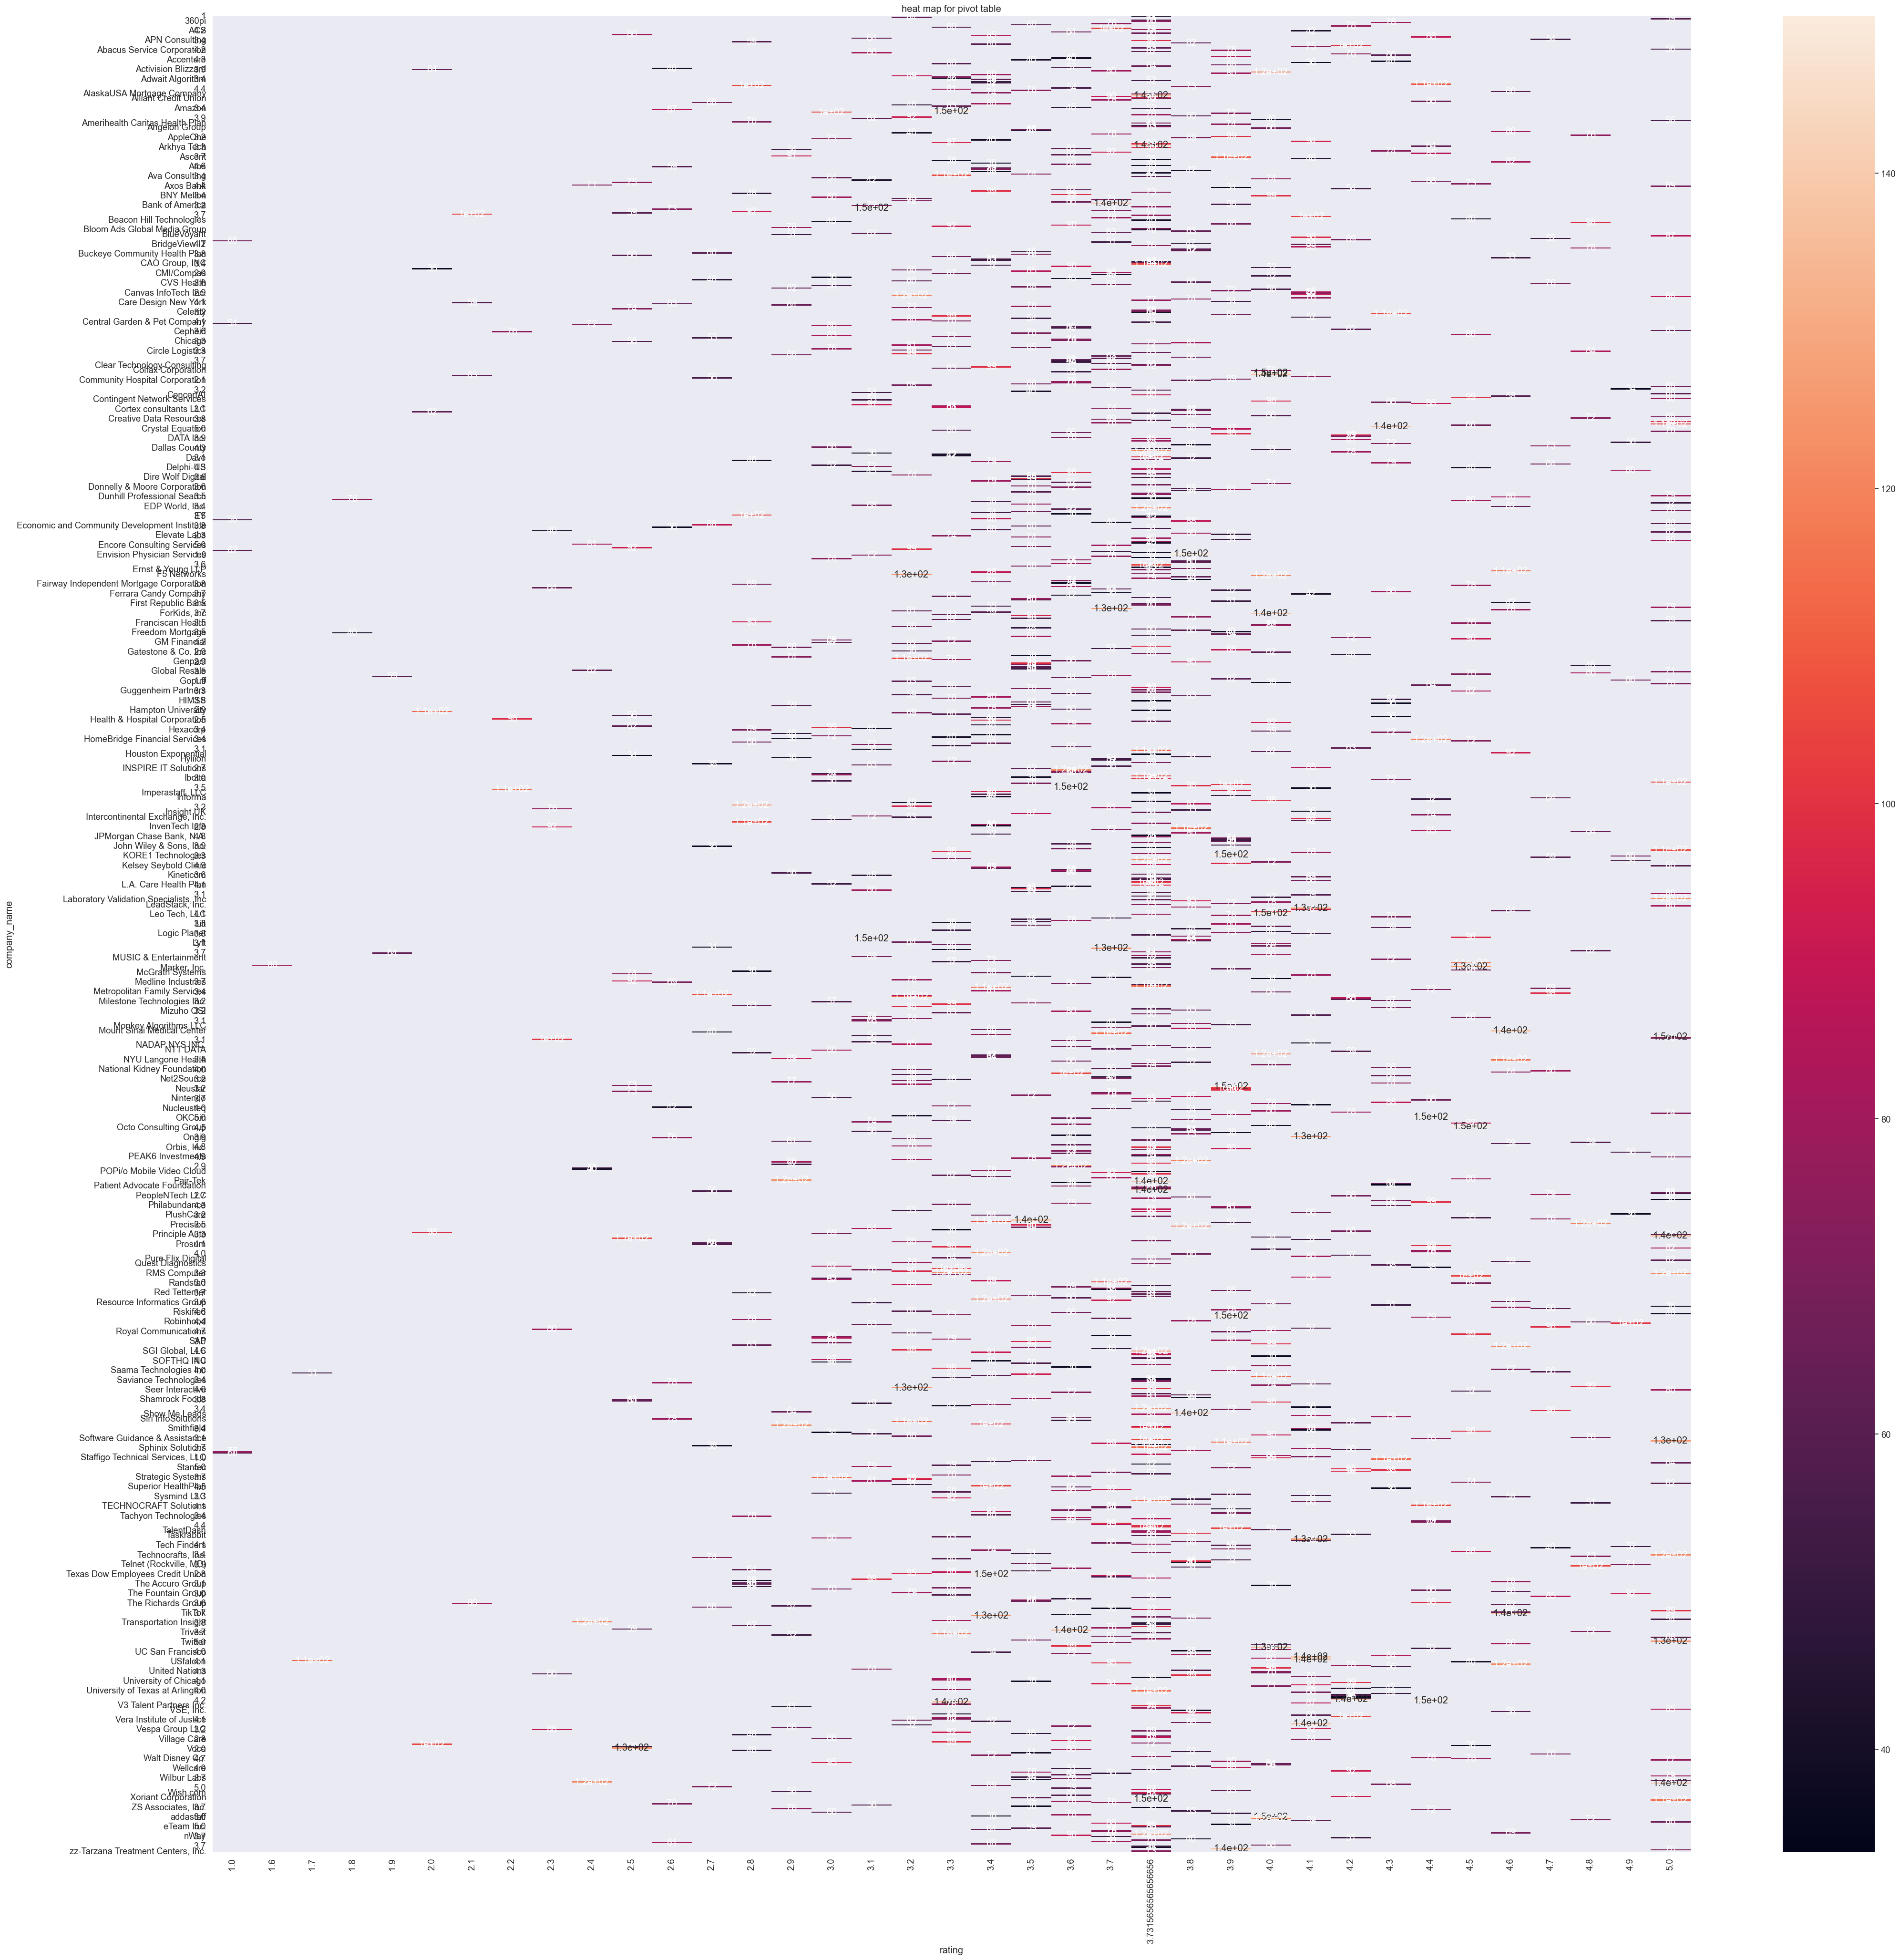

In [85]:
#visualize the Average salary based on company name and it`s rating
x=pd.pivot_table(index='company_name',columns='rating',values='avr',data=df)
x
sns.set(rc={'figure.figsize': [50, 50]}, font_scale=1.2)
sns.heatmap(x, annot=True).set(title='heat map for pivot table')

In [79]:
px.histogram(df,x='rating',y='company_name',color='avr',color_discrete_sequence=['blue'],text_auto=True,title='visualize the Average salary based on company name and it`s rating')
px.scatter(df,x=x.index,y=x.columns,color_discrete_sequence=['blue'],text_auto=True,title='visualize the Average salary based on company name and it`s rating')

In [81]:
px.histogram(df,x=x.index,y=x.columns,color_discrete_sequence=['blue'],text_auto=True,title='visualize the Average salary based on company name and it`s rating')
px.scatter(df,x='rating',y='company_name',color='avr',color_discrete_sequence=['blue'],title='visualize the Average salary based on company name and it`s rating')

# Congratulations for your great effort

